In [37]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import pandas as pd
import seaborn as sns

import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "regression"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

import platform
from matplotlib import font_manager, rc

#매킨토시의 경우
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
#윈도우의 경우
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

mpl.rcParams['axes.unicode_minus'] = False


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
import warnings
warnings.filterwarnings(action='ignore')

# 단순 선형 회귀

In [38]:
# 샘플 데이터 생성
X=2*np.random.rand(100,1) # 100 개의 독립변수 생성
y=4+3*X+np.random.randn(100,1) # 100개의 종속 변수 생성.

# 모든 샘플에 1을 추가
X_b=np.c_[np.ones((100,1)),X]
# 역행렬을 구하고 (inc) 행렬 곱셈 (dot)을 수행
theta_best=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

print(theta_best) # 잡음 때문에 4와 3은 나오지 않는다. 

[[4.21509616]
 [2.77011339]]


In [39]:
# 예측
X_new=np.array([[0],[2]])

X_new_b=np.c_[np.ones((2,1)),X_new]
y_predict=X_new_b.dot(theta_best)
print(y_predict)

[[4.21509616]
 [9.75532293]]


# 보스톤 주택 정보를 이용한 선형 회귀

In [40]:
data_url="http://lib.stat.cmu.edu/datasets/boston"
raw_df=pd.read_csv(data_url,sep='\s+',skiprows=22,header=None)
data=np.hstack([raw_df.values[::2,:],raw_df.values[1::2,:2]])
target=raw_df.values[1::2,2]
print(target)
data

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [41]:
bostonDF=pd.DataFrame(data,columns= ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','TAX','PTRATIO','B','LSTAT',
'RAD'])
bostonDF['PRICE']=target
print(bostonDF.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  TAX  PTRATIO     B  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0    296.0  15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0    242.0  17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0    242.0  17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0    222.0  18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0    222.0  18.7   

    LSTAT   RAD  PRICE  
0  396.90  4.98   24.0  
1  396.90  9.14   21.6  
2  392.83  4.03   34.7  
3  394.63  2.94   33.4  
4  396.90  5.33   36.2  


In [42]:
cols=['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD','PRICE']
bostonDF[cols].corr()

,RM,ZN,INDUS,NOX,AGE,PTRATIO,LSTAT,RAD,PRICE
RM,1.000000,0.311991,-0.391676,-0.302188,-0.240265,-0.292048,0.128069,-0.613808,0.695360
ZN,0.311991,1.000000,-0.533828,-0.516604,-0.569537,-0.314563,0.175520,-0.412995,0.360445
INDUS,-0.391676,-0.533828,1.000000,0.763651,0.644779,0.720760,-0.356977,0.603800,-0.483725
NOX,-0.302188,-0.516604,0.763651,1.000000,0.731470,0.668023,-0.380051,0.590879,-0.427321
AGE,-0.240265,-0.569537,0.644779,0.731470,1.000000,0.506456,-0.273534,0.602339,-0.376955
PTRATIO,-0.292048,-0.314563,0.720760,0.668023,0.506456,1.000000,-0.441808,0.543993,-0.468536
LSTAT,0.128069,0.175520,-0.356977,-0.380051,-0.273534,-0.441808,1.000000,-0.366087,0.333461
RAD,-0.613808,-0.412995,0.603800,0.590879,0.602339,0.543993,-0.366087,1.000000,-0.737663
PRICE,0.695360,0.360445,-0.483725,-0.427321,-0.376955,-0.468536,0.333461,-0.737663,1.000000


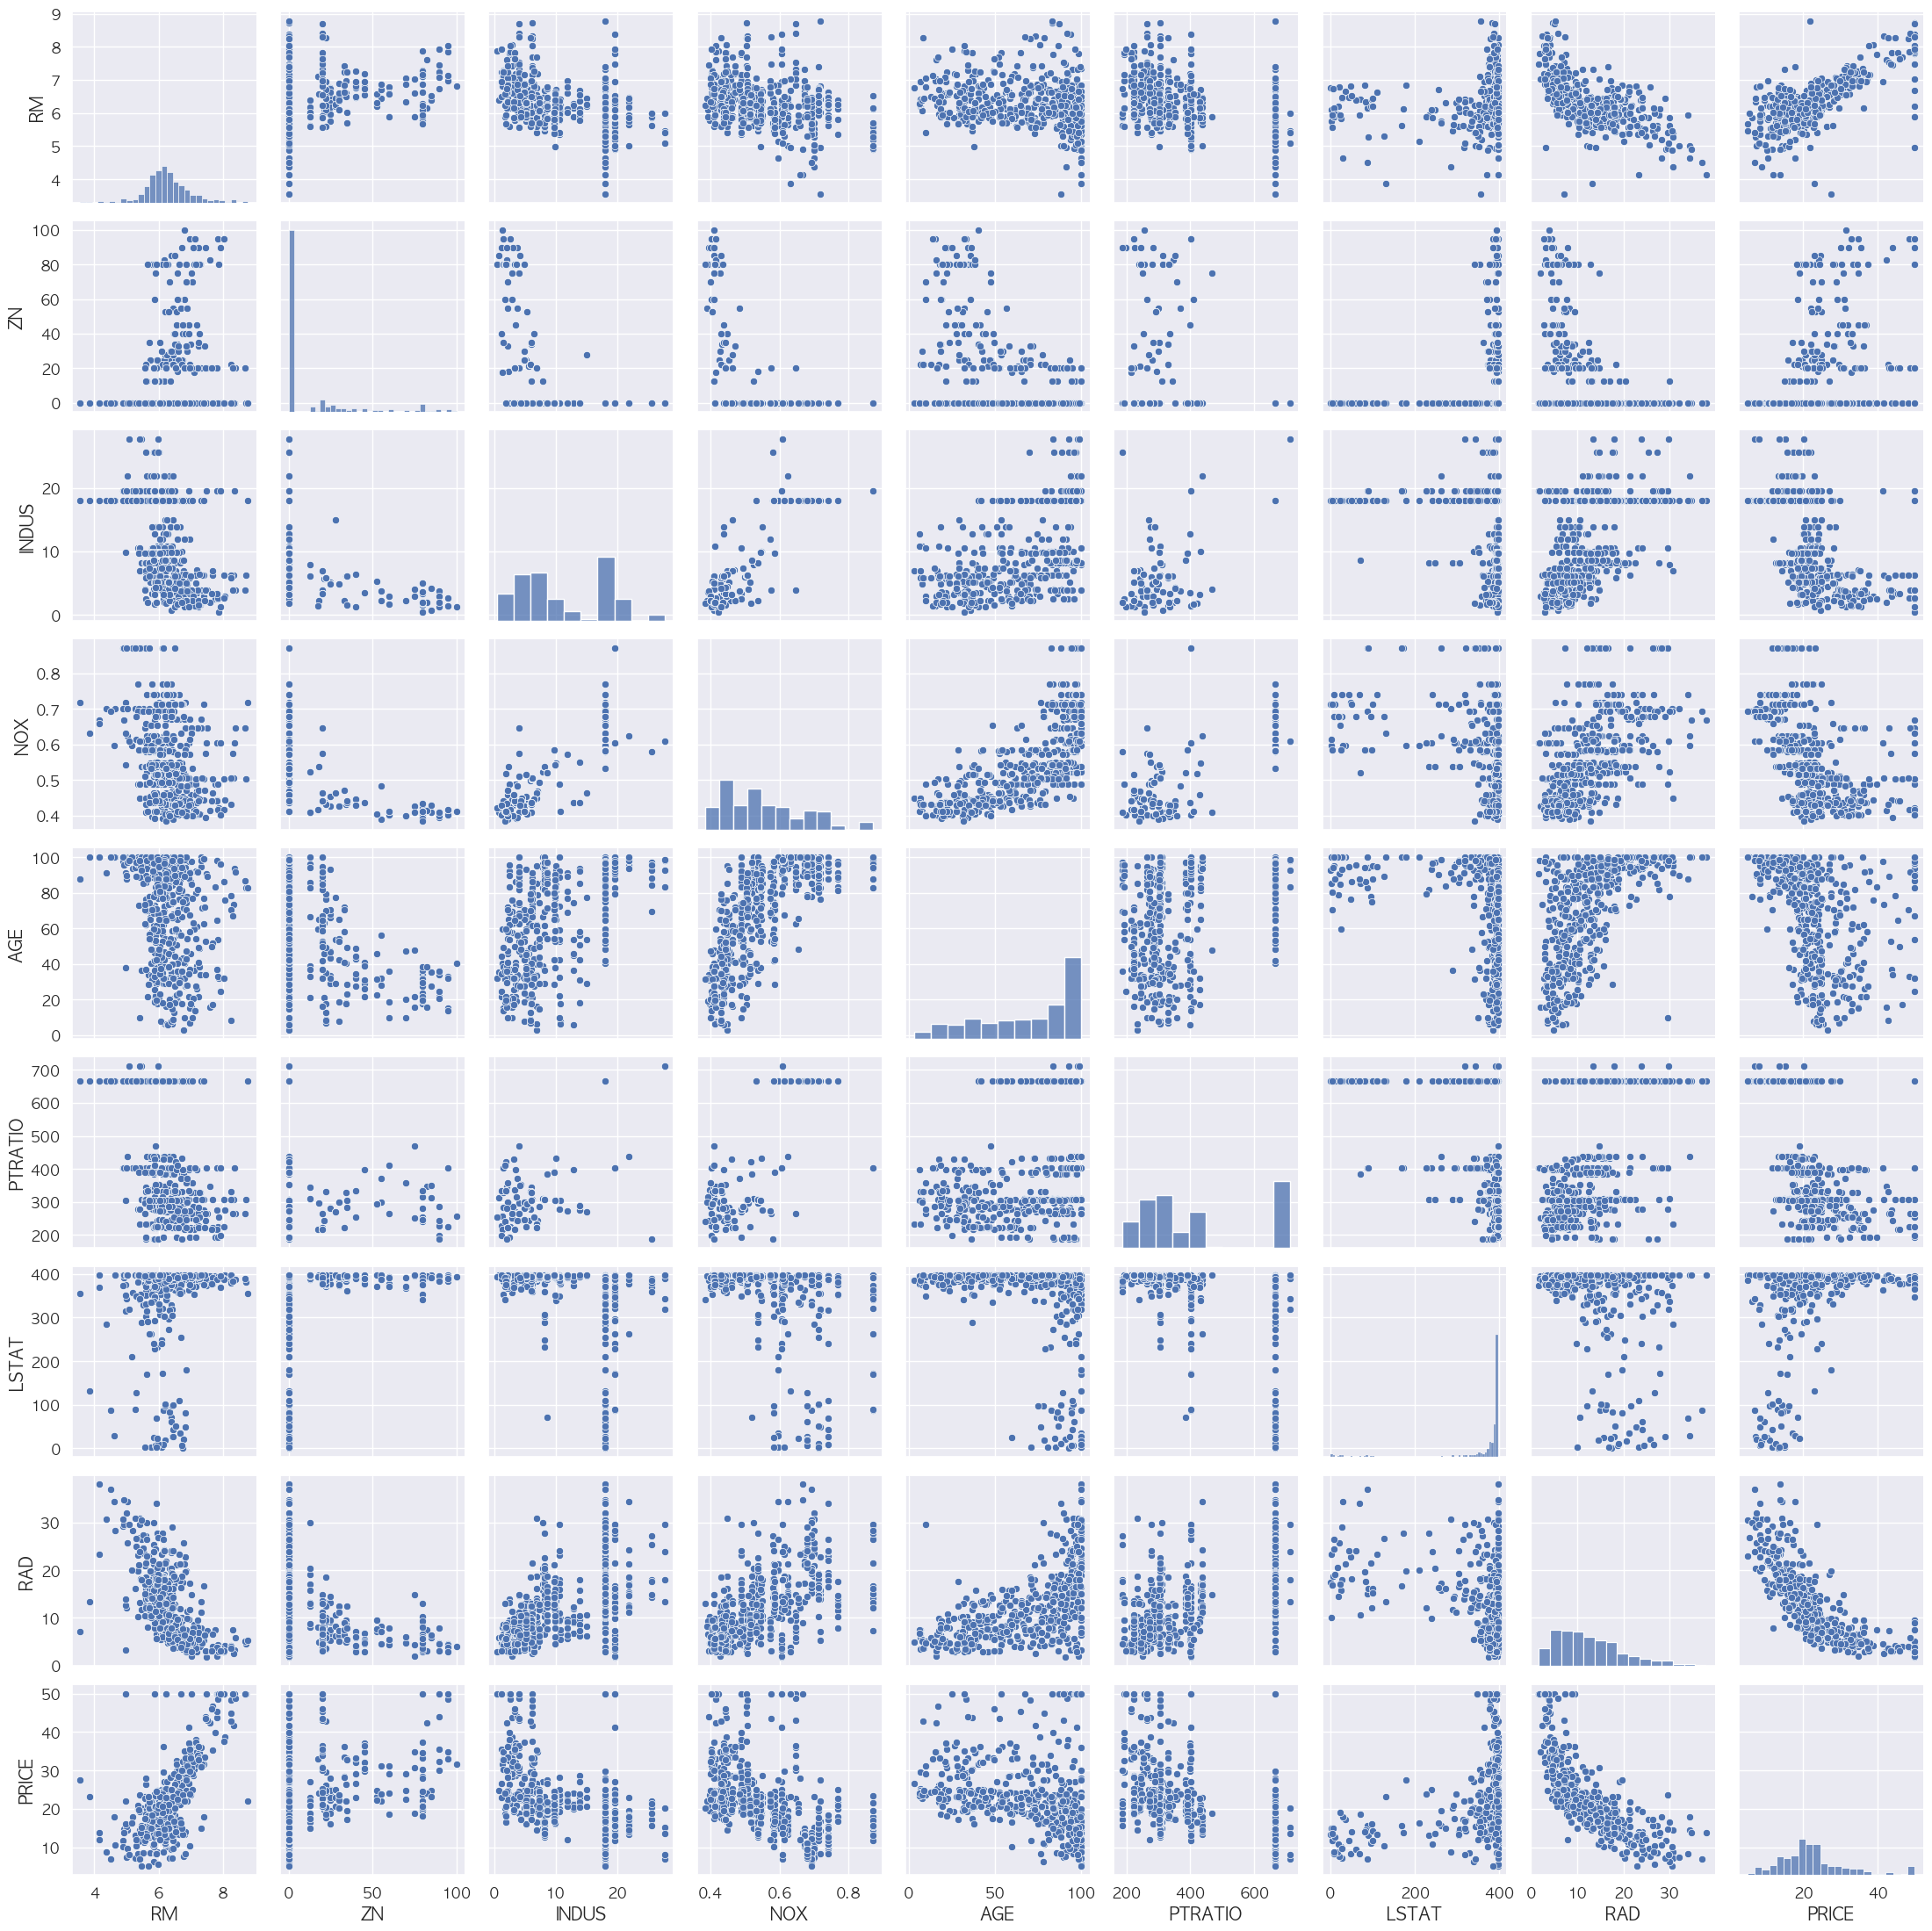

In [43]:
# 데이터의 상관관계를 파악하기 위해 시각화
sns.pairplot(bostonDF[cols],height=2.5)
plt.show()

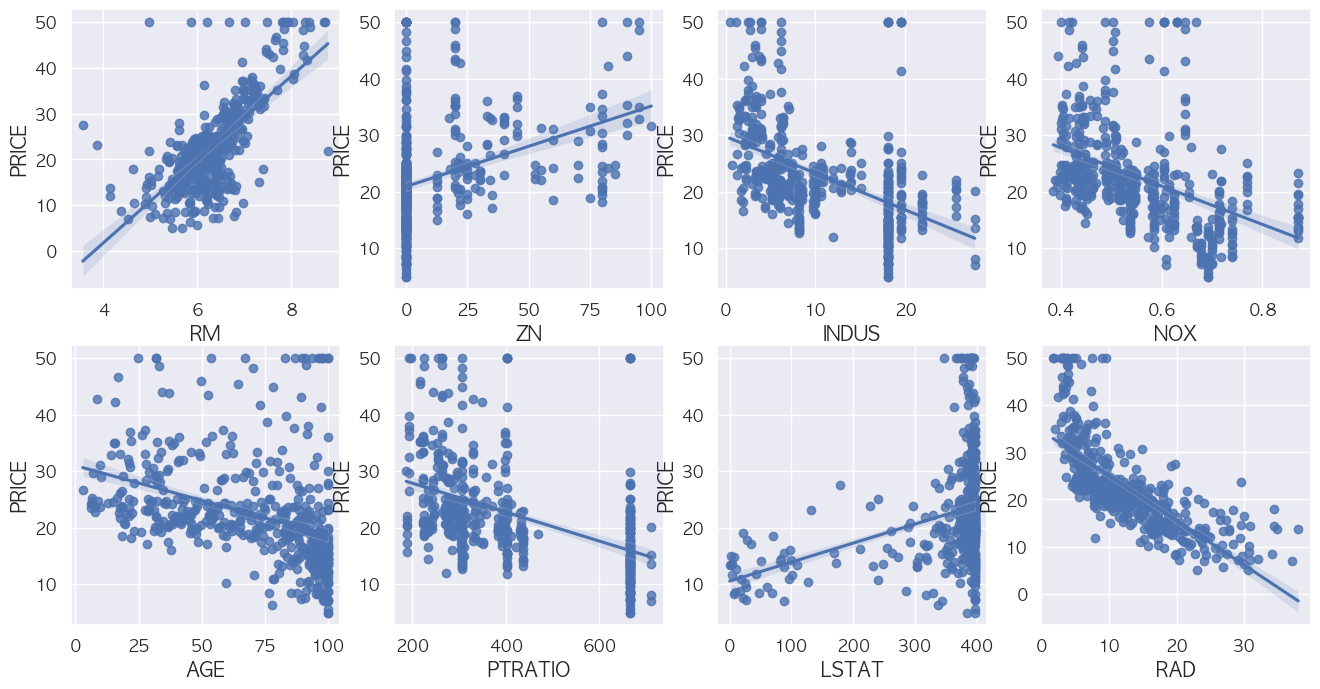

In [44]:
# 피쳐로 사용할 열들의 상관 관계를 확인. 
# 피쳐들간의 상관관계가 높으면 다중 공선성이 발생한다. 


# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,8) , ncols=4 , nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature , y='PRICE',data=bostonDF , ax=axs[row][col])

# y 자리에 독립변수를 넣으면 상관관계 파악이 가능하다. 




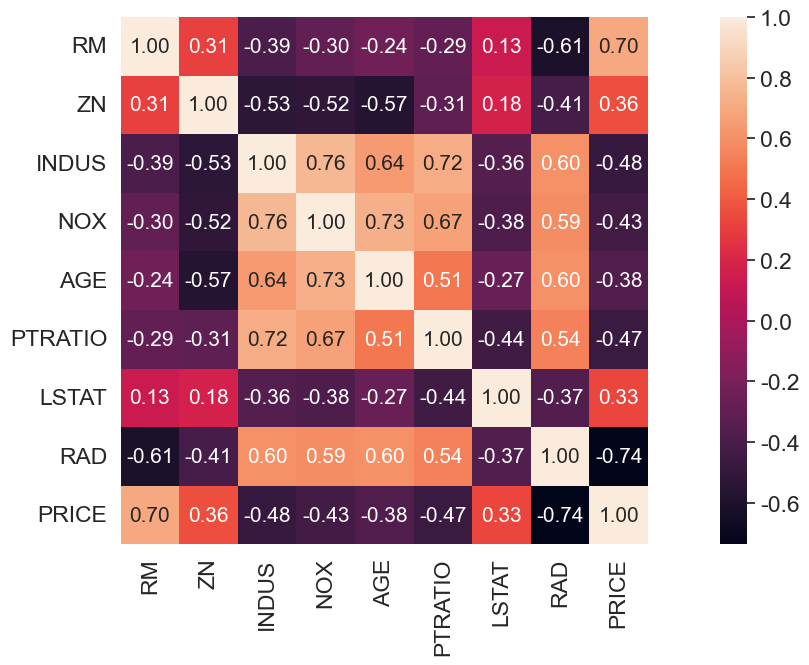

In [45]:
#5개 속성의 상관 계수 확인
import numpy as np
cm = np.corrcoef(bostonDF[cols].values.T)
plt.figure(figsize=(15,7))
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=cols,
                 xticklabels=cols)

plt.tight_layout()
plt.show()

In [46]:
# Rm 을 이용한 PRice 예측 - 단변량 회귀
from scipy import stats
slope,intercept,r_value,p_value,stderr=stats.linregress(bostonDF['RM'],bostonDF['PRICE'])

print("기울기:", slope)
print("절편:", intercept)
print("상관계수", r_value)
print("불확실성 정도:", p_value)
print("방이 4개일 때 주택 가격:", end=' ')
print((4 * slope + intercept) * 1000, '$')
print('=======================================================')

기울기: 9.102108981180313
절편: -34.67062077643858
상관계수 0.6953599470715396
불확실성 정도: 2.487228871007385e-74
방이 4개일 때 주택 가격: 1737.8151482826709 $


In [47]:
# sklearn 을 이용한 단변량 회귀
from sklearn.linear_model import LinearRegression

slr=LinearRegression()
X=bostonDF[['RM']].values
y=bostonDF['PRICE'].values
slr.fit(X,y)
print('기울기: ',slr.coef_) # 배열로 제공. => 여러개가 나오면 다변량 회귀분석. 
print('절편',slr.intercept_)

기울기:  [9.10210898]
절편 -34.67062077643851


* 선형 회귀 모델에서의 outlier

In [48]:
# RANSAC 방법을 이용한 회귀
from sklearn.linear_model import RANSACRegressor

ransac=RANSACRegressor(LinearRegression(),max_trials=100,min_samples=50,loss='absolute_error',residual_threshold=5.0,random_state=42)
ransac.fit(X,y)


print('기울기: %.3f' % ransac.estimator_.coef_[0])
print('절편: %.3f' % ransac.estimator_.intercept_)

기울기: 9.520
절편: -36.493


### MSE 와 R^2 값을 이용한 성능 평가

In [49]:
from sklearn.model_selection import train_test_split

#회귀분석 수행
X = bostonDF[['RM']].values
y = bostonDF['PRICE'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

slr = LinearRegression()

slr.fit(X_train, y_train)

#분석의 결과로나온 모델을 가지고 훈련 데이터와 검증 데이터의 결과를 생성
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)



from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('훈련 MSE: %.3f, 테스트 MSE: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))

print('훈련 R^2: %.3f, 테스트 R^2: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

훈련 MSE: 45.013, 테스트 MSE: 40.351
훈련 R^2: 0.488, 테스트 R^2: 0.458


#### 보스턴 주택 가격을 다변량 선형 회귀를 이용해 예측한다.

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)

X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3, random_state=156)

# Linear Regression OLS로 학습/예측/평가 수행. 
lr = LinearRegression()
lr.fit(X_train ,y_train )
y_preds = lr.predict(X_test)
# MSE 는 제곱하기 때문에 실제 데이터보다 스케일이 크다.
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297 , RMSE : 4.159
Variance score : 0.757


In [52]:
print('절편 값:',lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))

절편 값: 40.9955951721644
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


*  score.csv 파일의 데이터를 이용해 iq 와 academy,game,tv 정보를 이용해 score 예측

In [54]:
import pandas as pd
import statsmodels.formula.api as sm
df = pd.read_csv("./python_machine_learning/data/score.csv", encoding="ms949")

result = sm.ols(formula = 'score ~ iq + academy + game + tv', data = df).fit()

print('절편과 기울기')
print(result.params)
print()
print('유의확률:' , result.pvalues)
print()

print('결정계수:' , result.rsquared)

print('각 학생의 예측 점수:', result.predict())

#IQ가 130이고 학원을 3개 다니고 게임을 2시간하고 TV를 1시간 보는 학생의 예측 점수는?
y = result.params.Intercept + 130*result.params.iq + 3*result.params.academy + 2*result.params.game+1*result.params.tv
print("예측점수:" , y)

절편과 기울기
Intercept    23.299232
iq            0.468422
academy       0.717901
game         -0.838955
tv           -1.385408
dtype: float64

유의확률: Intercept    0.117508
iq           0.003376
academy      0.534402
game         0.131001
tv           0.184269
dtype: float64

결정계수: 0.960835106214887
각 학생의 예측 점수: [89.47516936 75.89680196 74.68614801 82.68433242 63.58609587 80.84448722
 82.54342107 72.89049111 86.12886227 80.2641907 ]
예측점수: 83.28448678034147


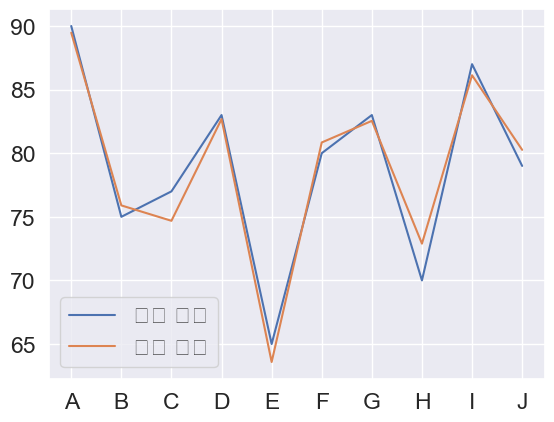

In [56]:
plt.figure()
plt.plot(df['score'], label='실제 성적')
plt.plot(result.predict(), label='예측 성적')
plt.xticks(range(0,10,1),df['name'])
plt.legend();
plt.show()

#### 다중 공선성 문제 - VIF ( 분산 팽창 요인 )

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#print(df)

X = df.drop(['score', 'name'], axis = 1)
#print(X)

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif.round(1))


X = df.drop(['score', 'name', 'academy'], axis = 1)

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif.round(1))

   VIF Factor features
0        31.2       iq
1        13.4  academy
2         3.1     game
3         7.8       tv
   VIF Factor features
0         3.5       iq
1         2.9     game
2         3.0       tv


#### ridge regression 대입

In [62]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)

# Ridge에 사용될 alpha 파라미터의 값들을 정의
alphas = [0 , 0.1 , 1 , 10 , 100]

# alphas list 값을 iteration하면서 alpha에 따른 평균 rmse 구함.
for alpha in alphas :
    ridge = Ridge(alpha = alpha)
    
    #cross_val_score를 이용하여 5 fold의 평균 RMSE 계산
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f} '.format(alpha,avg_rmse))

alpha 0 일 때 5 folds 의 평균 RMSE : 5.829 
alpha 0.1 일 때 5 folds 의 평균 RMSE : 5.788 
alpha 1 일 때 5 folds 의 평균 RMSE : 5.653 
alpha 10 일 때 5 folds 의 평균 RMSE : 5.518 
alpha 100 일 때 5 folds 의 평균 RMSE : 5.330 


## KNN 이용

In [63]:
from sklearn.neighbors import KNeighborsRegressor

#모델 생성 - 이웃의 개수는 3개, 가중 평균 이용(weights 의 값을 uniform으로 설정하면 일반 평균)
regressor = KNeighborsRegressor(n_neighbors = 3, weights = "distance")

#피처 와 레이블 생성
training_points = [
  [0.5, 0.2, 0.1],
  [0.9, 0.7, 0.3],
  [0.4, 0.5, 0.7]
]
training_labels = [5.0, 6.8, 9.0]

#모델 훈련
regressor.fit(training_points, training_labels)

unknown_points = [
  [0.2, 0.1, 0.7],
  [0.4, 0.7, 0.6],
  [0.5, 0.8, 0.1]
]

#예측
guesses = regressor.predict(np.array(unknown_points))
print(guesses)

[7.28143288 7.76451922 6.8457845 ]


## DT regression

In [64]:
#모델 생성 및 훈련
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

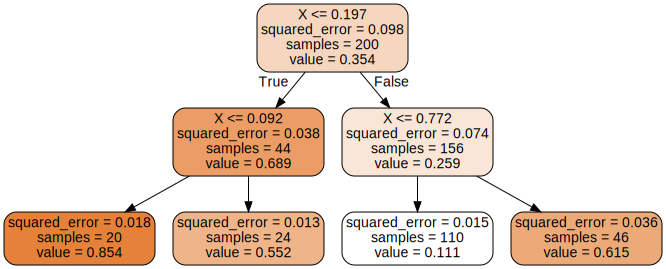

In [65]:
#모델 시각화
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_reg,
        out_file="decision_tree.dot",
        feature_names=["X"],
        class_names="y",
        rounded=True,
        filled=True
    )

with open('decision_tree.dot') as f:
    dot_graph = f.read()
src = Source(dot_graph)

src

In [ ]:
# max-depth 변화


# 터미널의 개수가 10 이상이어야 한다는 제약
# MIN_samples_leaf 를 설정하게 되면 각 터미널의 depth 가 일정하지 않ㅇ르 수 있따. 
tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")
    
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])    
plot_regression_predictions(tree_reg1, X, y)

for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.sca(axes[1])
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

save_fig("tree_regression_plot")
plt.show()


## SVM

In [66]:
#시드 고정 후 가우시안 분포를 따르는 데이터셋을 만듭니다.
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m,1)
# Ravel 은 차원을 하나로 줄이는 역할을 하는 함수
# X 때문에 2차원 배열로 만들어지는 타겟은 1차원 배열이어야 해서 차원을 수정
# flatten 이나 reshape 를 이용해ㅓㅅ 조절해도 된다.
y = (4+3*X+np.random.randn(m,1)).ravel()

X_train = X[:40]
X_test = X[40:]

y_train = y[:40]
y_test = y[40:]

In [67]:
# 모델 생성 과 훈련
from sklearn.svm import LinearSVR
# svm_reg1 = 마진이 큰 모형(epsilon=1.5)
svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X_train,y_train)

LinearSVR(epsilon=1.5, random_state=42)

In [68]:
# 예측 및 결과 비교
y_pred = svm_reg.predict(X_test)
print(y_test)
print(y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(rmse)

[4.51255752 7.32817403 5.68422517 8.93765219 4.74418629 7.47337666
 6.78566857 7.44915924 6.75050147 5.62239417]
[4.21074507 6.48935892 3.6755021  9.01837335 5.04577413 7.51127252
 5.36900389 6.64135932 6.80405331 4.59433948]
0.9299366061913275


In [70]:
#마진이 작은 모형(epsilon=0.5)
svm_reg = LinearSVR(epsilon=0.5, random_state=42)
svm_reg.fit(X,y)

y_pred = svm_reg.predict(X_test)
print(y_test)
print(y_pred)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(rmse)

[0.72288633 0.30244777 0.10424021 0.55932966 0.13618366 0.30486687
 0.46721879 0.18328738 0.67364758 0.2372651  0.49554194 0.52327493
 0.36363588 0.14439161 0.31208842 0.11725508 0.19786996 0.23012401
 0.58320692 0.51179488]
[0.32739298 0.28422136 0.23158121 0.18345263 0.22799583 0.2305524
 0.30335976 0.28678844 0.33173333 0.25702218 0.19354065 0.30041426
 0.30897283 0.27305587 0.31080589 0.2609073  0.26611681 0.24897963
 0.17658651 0.19143382]
0.21645933233425513


In [69]:
# 비선형 커널 SVM

# 데이터 생성
np.random.seed(42)
m = 100
X = 2* np.random.rand(m,1) -1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m,1) / 10).ravel()

X_train = X[:80]
X_test = X[80:]

y_train = y[:80]
y_test = y[80:]